<a href="https://colab.research.google.com/github/navidadkhah/Advanced-Bug-Detection-and-Fixing-Using-Fine-Tuned-LLM/blob/main/Evaluation/CodeBELU_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Libraries

In [1]:
!pip install codebleu==0.1.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 kB 19.0 MB/s eta 0:00:00


In [2]:
from codebleu import calc_codebleu
from codebleu import calc_codebleu
from nltk.translate.bleu_score import sentence_bleu

import numpy as np
import pandas as pd

# Reading the Datasets



In [3]:
# Original Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/bug_evaluation_dataset.csv"
df = pd.read_csv(path)
print(df.shape)
df.head()

(25793, 5)


,original_code,modified_code,changed_line,number_of_line,mutation_type
0,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,"for j in range(y-1, r):",14,statement
1,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,if k<1:,8,decision
2,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,if k<1:,8,decision
3,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,"for j in range(l&1, r):",14,operation
4,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,"l, r, k = list(z(int, input().split()))",7,statement


In [4]:
# Simple prompt Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_3000.csv"
simple_prompt_df = pd.read_csv(path)
print(simple_prompt_df.shape)
simple_prompt_df.head()

(3000, 1)


,simple_prompt
0,Here is the corrected code:\n\n```\nn = int(in...
1,```\nn = int(input())\nw = [2] * n\nans0 = n\n...
2,```\nn = int(input())\nw = [2] * n\nans = [0] ...
3,```\nn = int(input())\nw = [2] * n\nans0 = n\n...
4,```\nn = int(input())\nw = [2] * n\nans0 = n\n...


In [5]:
# Comment prompt Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_comments_1000.csv"
commented_prompt_df = pd.read_csv(path)
print(commented_prompt_df.shape)
commented_prompt_df.head()

(1000, 1)


,simple_prompt
0,Here is the code with comments:\n\n```\nn = in...
1,Here is the code with comments:\n\n```\nn = in...
2,Here is the code with comments:\n\n```\nn = in...
3,Here is the code with comments:\n\n```\nn = in...
4,Here is the code with comments:\n\n```\nn = in...


In [6]:
# Comment prompt with persona Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_comment_persona_500.csv"
commented_persona_df = pd.read_csv(path)
print(commented_persona_df.shape)
commented_persona_df.head()

(500, 1)


,simple_prompt
0,I'd be happy to help!\n\n**Step 1: Realize the...
1,I'll follow the steps to fix the bug.\n\n**Ste...
2,I'd be happy to help you debug and improve thi...
3,I'll follow the steps to fix the bug.\n\n**Ste...
4,I'll follow the steps to fix the bug.\n\n**Ste...


In [7]:
# hallucination prompt Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_hallucination_500.csv"
hallucination_prompt_df = pd.read_csv(path)
print(hallucination_prompt_df.shape)
hallucination_prompt_df.head()

(500, 1)


,simple_prompt
0,Here's the step-by-step process:\n\n**Step 1: ...
1,Here is the code with comments:\n\n```\n# Read...
2,Here are the steps:\n\n**Step 1: Realize the c...
3,Here are the steps:\n\n**Step 1: Realize the c...
4,Here are the steps:\n\n**Step 1: Understand th...


In [8]:
# Comment prompt with new persona Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_comment_persona_new_1000.csv"
new_persona_prompt_df = pd.read_csv(path)
print(new_persona_prompt_df.shape)
new_persona_prompt_df.head()

(1000, 1)


,simple_prompt
0,Here is the analyzed code with comments:\n\n``...
1,Here is the fixed code:\n\n```python\nn = int(...
2,Here is the fixed code:\n\n```\nn = int(input(...
3,Here is the fixed code:\n\n```\nn = int(input(...
4,Here is the analyzed code with comments:\n\n``...


In [9]:
# COT_df
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_COT_500.csv"
COT_df = pd.read_csv(path)
print(COT_df.shape)
COT_df.head()

(500, 1)


,simple_prompt
0,The bug in this code is that the variable `y` ...
1,The bug in this code is that it doesn't initia...
2,Here's the corrected code:\n\n```Python\nn = i...
3,The problem with this code is that it doesn't ...
4,The bug in this code is that it's trying to us...


In [11]:
# few_df Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_fewShot.csv"
few_df = pd.read_csv(path)
print(few_df.shape)
few_df.head()

(1000, 1)


,simple_prompt
0,The submitted code is:\n\n```\nn = int(input()...
1,The submitted code: \n\n```\nn = int(input())\...
2,Here is the fixed code:\n\n```\nn = int(input(...
3,Fixed code: n = int(input())\nw = [2] * n\nans...
4,Fixed code:\n\nn = int(input())\nw = [2] * n\n...


In [12]:
# Fine-Tuned Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_fine_tuned200.csv"
fine_tuned_df = pd.read_csv(path)
print(fine_tuned_df.shape)
fine_tuned_df.head()

(201, 1)


,Response
0,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,n = int(input())\nw = [2] * n\nans0 = n\nans =...
3,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,n = int(input())\nw = [2] * n\nans0 = n\nans =...


# Preprocessing Datasets


In [14]:
# Preprocess hallucination_prompt_df
def extract_last_code_block(lines):
    # Join the list into a single text block
    text_block = "\n".join(lines)
    # print(text_block)

    # Split by ```
    code_blocks = text_block.split('```')
    # print(len(code_blocks))

    # Return the last part of the split
    if(code_blocks[len(code_blocks)-2].strip().startswith("*")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Step")\
       or code_blocks[len(code_blocks)-2].strip().startswith("The")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Code")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Fixed")\
       or code_blocks[len(code_blocks)-2].strip().startswith("...")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Now")\
       or code_blocks[len(code_blocks)-2].strip().startswith("This")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Bug")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Here")):
       last_part = code_blocks[len(code_blocks)-1].strip() if code_blocks else ""
    else:
       last_part = code_blocks[len(code_blocks)-2].strip() if code_blocks else ""

    if last_part.startswith("python"):
       last_part = last_part[len("python"):].strip()
    elif last_part.startswith("Python"):
         last_part = last_part[len("Python"):].strip()


    non_blank_lines = [line for line in last_part.splitlines() if line.strip()]
    return "\n".join(non_blank_lines)

    # return cleaned_lines

    # return last_part

# Iterate over each row in the DataFrame
for row in range(len(hallucination_prompt_df)):
    # Split the 'simple_prompt' into lines
    input_lines = hallucination_prompt_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = extract_last_code_block(input_lines)
    # print(f"Iteration number {row} has finished")

    # # Save the generated code into a new column
    hallucination_prompt_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
hallucination_prompt_df.head(10)

,simple_prompt,generated_code
0,Here's the step-by-step process:\n\n**Step 1: ...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,Here is the code with comments:\n\n```\n# Read...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,Here are the steps:\n\n**Step 1: Realize the c...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
3,Here are the steps:\n\n**Step 1: Realize the c...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,Here are the steps:\n\n**Step 1: Understand th...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
5,Here are the steps you requested:\n\n**Step 1:...,n = int(input())\ngraph = {}\ninp = input().sp...
6,Here's the step-by-step process:\n\n**Step 1: ...,n = int(input())\ngraph = {}\ninp = input().sp...
7,Here is the fixed code:\n\n```\ndef f(n):\n ...,def f(n):\n count = 1\n while n > 0:\n ...
8,Here are the steps:\n\n**Step 1: Realize the c...,def f(n):\n count = 1\n while(n>0):\n ...
9,Here is the code with comments:\n\n```\ndef f(...,def f(n):\ncount = 1\nwhile(n>0):\n if n%10...


In [15]:
# Preprocess commented_prompt_df
def generate_code_from_list(lines):
    # Join the list of strings into a single code block
    code_block = "\n".join(lines)

    # Remove any lines before and after the code block
    code_block = code_block.split('```')[1].split('```')[0].strip()

    # Replace the placeholder 'x' with a proper definition (e.g., 'a')
    # code_block = code_block.replace("x", "a")  # Fixing the undefined variable bug

    # Remove comments (inline and block)
    code_block = "\n".join([
        line.split("#")[0].strip()  # Keep only the part before the inline comment (if any)
        for line in code_block.splitlines()
        if line.strip() and not line.strip().startswith("#")  # Exclude full-line comments
    ])


    if code_block.startswith("python"):
       code_block = code_block[len("python"):].strip()
    elif code_block.startswith("Python"):
         code_block = code_block[len("Python"):].strip()

    return code_block


# Iterate over each row in the DataFrame
for row in range(len(commented_prompt_df)):
    # Split the 'simple_prompt' into lines
    input_lines = commented_prompt_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = generate_code_from_list(input_lines)

    # # Save the generated code into a new column
    commented_prompt_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
commented_prompt_df.head()

,simple_prompt,generated_code
0,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
3,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...


In [16]:
# Preprocess commented_persona_df
def generate_code_from_list(lines):
    # Join the list of strings into a single code block
    code_block = "\n".join(lines)

    # Remove any lines before and after the code block
    code_block = code_block.split('```')[1].split('```')[0].strip()

    # Replace the placeholder 'x' with a proper definition (e.g., 'a')
    # code_block = code_block.replace("x", "a")  # Fixing the undefined variable bug

    # Remove comments (inline and block)
    code_block = "\n".join([
        line.split("#")[0].strip()  # Keep only the part before the inline comment (if any)
        for line in code_block.splitlines()
        if line.strip() and not line.strip().startswith("#")  # Exclude full-line comments
    ])


    if code_block.startswith("python"):
       code_block = code_block[len("python"):].strip()
    elif code_block.startswith("Python"):
         code_block = code_block[len("Python"):].strip()

    return code_block



# Iterate over each row in the DataFrame
for row in range(len(commented_persona_df)):
    # Split the 'simple_prompt' into lines
    input_lines = commented_persona_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = generate_code_from_list(input_lines)

    # # Save the generated code into a new column
    commented_persona_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
commented_persona_df.head()

,simple_prompt,generated_code
0,I'd be happy to help!\n\n**Step 1: Realize the...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,I'll follow the steps to fix the bug.\n\n**Ste...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,I'd be happy to help you debug and improve thi...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
3,I'll follow the steps to fix the bug.\n\n**Ste...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,I'll follow the steps to fix the bug.\n\n**Ste...,n = int(input())\nw = [2] * n\nans0 = n\nans =...


In [17]:
def generate_code_from_list(lines):
    # Join the list into a single text block
    text_block = "\n".join(lines)
    # print(text_block)

    # Split by ```
    code_blocks = text_block.split('```')
    # print(len(code_blocks))

    # Return the last part of the split
    if(code_blocks[len(code_blocks)-2].strip().startswith("*")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Step")\
       or code_blocks[len(code_blocks)-2].strip().startswith("The")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Code")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Fixed")\
       or code_blocks[len(code_blocks)-2].strip().startswith("...")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Now")\
       or code_blocks[len(code_blocks)-2].strip().startswith("This")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Bug")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Here")):
       last_part = code_blocks[len(code_blocks)-1].strip() if code_blocks else ""
    else:
       last_part = code_blocks[len(code_blocks)-2].strip() if code_blocks else ""

    if last_part.startswith("python"):
       last_part = last_part[len("python"):].strip()
    elif last_part.startswith("Python"):
         last_part = last_part[len("Python"):].strip()


    non_blank_lines = [line for line in last_part.splitlines() if line.strip()]
    return "\n".join(non_blank_lines)


# Iterate over each row in the DataFrame
for row in range(len(new_persona_prompt_df)):
    # Split the 'simple_prompt' into lines
    input_lines = new_persona_prompt_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = generate_code_from_list(input_lines)

    # # Save the generated code into a new column
    new_persona_prompt_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
new_persona_prompt_df.head()

,simple_prompt,generated_code
0,Here is the analyzed code with comments:\n\n``...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,Here is the fixed code:\n\n```python\nn = int(...,n = int(input())\nw = [2] * n\nans = []\nq = i...
2,Here is the fixed code:\n\n```\nn = int(input(...,n = int(input())\nw = [2] * n\nans = []\nq = i...
3,Here is the fixed code:\n\n```\nn = int(input(...,n = int(input())\nw = [2] * n\nans = []\nq = i...
4,Here is the analyzed code with comments:\n\n``...,n = int(input()) # get the number of elements...


In [18]:
# Preprocess commented_prompt_df
def generate_code_from_list(lines):
    # Join the list of strings into a single code block
    code_block = "\n".join(lines)

    # Remove any lines before and after the code block
    code_block = code_block.split('```')[1].split('```')[0].strip()

    # Replace the placeholder 'x' with a proper definition (e.g., 'a')
    # code_block = code_block.replace("x", "a")  # Fixing the undefined variable bug

    # Remove comments (inline and block)
    code_block = "\n".join([
        line.split("#")[0].strip()  # Keep only the part before the inline comment (if any)
        for line in code_block.splitlines()
        if line.strip() and not line.strip().startswith("#")  # Exclude full-line comments
    ])


    if code_block.startswith("python"):
       code_block = code_block[len("python"):].strip()
    elif code_block.startswith("Python"):
         code_block = code_block[len("Python"):].strip()

    return code_block


# Iterate over each row in the DataFrame
for row in range(len(COT_df)):
    # Split the 'simple_prompt' into lines
    input_lines = COT_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = generate_code_from_list(input_lines)

    # # Save the generated code into a new column
    COT_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
COT_df.head()

,simple_prompt,generated_code
0,The bug in this code is that the variable `y` ...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,The bug in this code is that it doesn't initia...,n = int(input())\nw = [2] * n\nans = [0] * q\n...
2,Here's the corrected code:\n\n```Python\nn = i...,n = int(input())\nw = [2] * n\nans = []\nq = i...
3,The problem with this code is that it doesn't ...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,The bug in this code is that it's trying to us...,n = int(input())\nw = [2] * n\nans0 = 0\nans =...


In [19]:
import re

def extract_clean_code_remove_submitted(text):
    # Check for code wrapped in backticks first
    match = re.search(r"```(?:python)?\n(.*?)```", text, re.DOTALL)
    if match:
        return match.group(1).strip()

    # Check for inline "Fixed code:" or similar phrases
    match = re.search(r"(?:[Ff]ixed code:|[Hh]ere's the fixed code:)(.*)", text, re.DOTALL)
    if match:
        return match.group(1).strip()

    # Handle multiline cases
    lines = text.splitlines()
    start_index = next((i for i, line in enumerate(lines)
                        if "Fixed code:" in line or "Here's the fixed code:" in line or "Submitted code:" in line), -1)
    if start_index != -1:
        # Extract lines after the label and skip lines with labels
        code_lines = [
            line for line in lines[start_index + 1:]
            if not re.search(r"(Fixed code:|Submitted code:|Here's the fixed code:)", line, re.IGNORECASE)
            and line.strip()  # Skip empty lines
        ]
        return "\n".join(code_lines).strip()

    # Return empty string if no matches
    return ""



# Apply the enhanced extraction function
few_df['generated_code'] = few_df['simple_prompt'].apply(extract_clean_code_remove_submitted)

# Display the first few rows to confirm updates
few_df.head()

,simple_prompt,generated_code
0,The submitted code is:\n\n```\nn = int(input()...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,The submitted code: \n\n```\nn = int(input())\...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,Here is the fixed code:\n\n```\nn = int(input(...,n = int(input())\nw = [2]*n\nans0 = n\nans = [...
3,Fixed code: n = int(input())\nw = [2] * n\nans...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,Fixed code:\n\nn = int(input())\nw = [2] * n\n...,n = int(input())\nw = [2] * n\nans0 = n\nans =...


In [20]:
def remove_submitted_code(text):
    # Remove all occurrences of "Submitted code:" from the text
    lines = text.splitlines()

    # Remove lines containing "Submitted code:"
    cleaned_lines = [line for line in lines if "Submitted code:" not in line]

    cleaned_lines = [line for line in lines if "Fixed code:" not in line]


    # Join the cleaned lines back into a single string
    return "\n".join(cleaned_lines).strip()

few_df['generated_code'] = few_df['generated_code'].apply(remove_submitted_code)

# Display the first few rows to confirm updates
few_df.head()

,simple_prompt,generated_code
0,The submitted code is:\n\n```\nn = int(input()...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,The submitted code: \n\n```\nn = int(input())\...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,Here is the fixed code:\n\n```\nn = int(input(...,n = int(input())\nw = [2]*n\nans0 = n\nans = [...
3,Fixed code: n = int(input())\nw = [2] * n\nans...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,Fixed code:\n\nn = int(input())\nw = [2] * n\n...,n = int(input())\nw = [2] * n\nans0 = n\nans =...


# CodeBELU metric

In [21]:
def codeBELU_metric(pred, ref):
  # Tokenize the code for BLEU calculation
  pred_tokens = pred.split()
  ref_tokens = [ref.split()]  # BLEU expects a list of references

  # Calculate the BLEU score
  bleu_score = sentence_bleu(ref_tokens, pred_tokens)
  return bleu_score

In [26]:
Bleu_score = {}

In [27]:
# Calculate BLEU scores for simple_prompt
bleu_scores = [codeBELU_metric(pred, ref) for pred, ref in zip(simple_prompt_df['simple_prompt'], df['original_code'])]
# # Compute the mean of BLEU scores
mean_bleu_score = sum(bleu_scores) / len(bleu_scores)
# mean_bleu_score = codeBELU_metric(simple_prompt_df['simple_prompt'][200], df['original_code'][200])
Bleu_score['P1: simple prompt'] = mean_bleu_score
print(f"Mean BLEU Score: {mean_bleu_score}")

Mean BLEU Score: 0.6589338331510101


In [28]:
# Calculate BLEU scores for commented_prompt_df
bleu_scores = [codeBELU_metric(pred, ref) for pred, ref in zip(commented_prompt_df['generated_code'], df['original_code'])]
# Compute the mean of BLEU scores
mean_bleu_score = sum(bleu_scores) / len(bleu_scores)
# mean_bleu_score = codeBELU_metric(commented_prompt_df['generated_code'][200], df['original_code'][200])
Bleu_score['P2: adding comments prompt'] = mean_bleu_score
print(f"Mean BLEU Score: {mean_bleu_score}")

Mean BLEU Score: 0.7111785830024714


In [29]:
# Calculate BLEU scores for COT_df
bleu_scores = [codeBELU_metric(pred, ref) for pred, ref in zip(COT_df['generated_code'], df['original_code'])]
# Compute the mean of BLEU scores
mean_bleu_score = sum(bleu_scores) / len(bleu_scores)
# mean_bleu_score = codeBELU_metric(hallucination_prompt_df['generated_code'][200], df['original_code'][200])
Bleu_score['P3: COT prompt'] = mean_bleu_score
print(f"Mean BLEU Score: {mean_bleu_score}")

Mean BLEU Score: 0.5837999471105255


In [30]:
# Calculate BLEU scores for commented_persona_df
bleu_scores = [codeBELU_metric(pred, ref) for pred, ref in zip(commented_persona_df['generated_code'], df['original_code'])]
# Compute the mean of BLEU scores
mean_bleu_score = sum(bleu_scores) / len(bleu_scores)
# mean_bleu_score = codeBELU_metric(hallucination_prompt_df['generated_code'][200], df['original_code'][200])
Bleu_score['P4: commented with persona'] = mean_bleu_score
print(f"Mean BLEU Score: {mean_bleu_score}")

Mean BLEU Score: 0.6833671932398048


In [31]:
# Calculate BLEU scores for hallucination_prompt_df
bleu_scores = [codeBELU_metric(pred, ref) for pred, ref in zip(hallucination_prompt_df['generated_code'], df['original_code'])]
# Compute the mean of BLEU scores
mean_bleu_score = sum(bleu_scores) / len(bleu_scores)
# mean_bleu_score = codeBELU_metric(hallucination_prompt_df['generated_code'][200], df['original_code'][200])
Bleu_score['P5: hallucination prompt'] = mean_bleu_score
print(f"Mean BLEU Score: {mean_bleu_score}")

Mean BLEU Score: 0.6217668402928449


In [32]:
# Calculate BLEU scores for few_df
bleu_scores = [codeBELU_metric(pred, ref) for pred, ref in zip(few_df['generated_code'], df['original_code'])]
# Compute the mean of BLEU scores
mean_bleu_score = sum(bleu_scores) / len(bleu_scores)
# mean_bleu_score = codeBELU_metric(hallucination_prompt_df['generated_code'][200], df['original_code'][200])
Bleu_score['P6: using few-shot prompts'] = mean_bleu_score
print(f"Mean BLEU Score: {mean_bleu_score}")

Mean BLEU Score: 0.7015581924610291


In [33]:
# Calculate BLEU scores for fine_tuned_df
bleu_scores = [codeBELU_metric(pred, ref) for pred, ref in zip(fine_tuned_df['Response'], df['original_code'])]
# Compute the mean of BLEU scores
mean_bleu_score = sum(bleu_scores) / len(bleu_scores)
# mean_bleu_score = codeBELU_metric(hallucination_prompt_df['generated_code'][200], df['original_code'][200])
Bleu_score['fine-tuned model'] = mean_bleu_score
print(f"Mean BLEU Score: {mean_bleu_score}")

Mean BLEU Score: 0.9381082450552267


In [34]:
Bleu_score

{'P1: simple prompt': 0.6589338331510101,
 'P2: adding comments prompt': 0.7111785830024714,
 'P3: COT prompt': 0.5837999471105255,
 'P4: commented with persona': 0.6833671932398048,
 'P5: hallucination prompt': 0.6217668402928449,
 'P6: using few-shot prompts': 0.7015581924610291,
 'fine-tuned model': 0.9381082450552267}

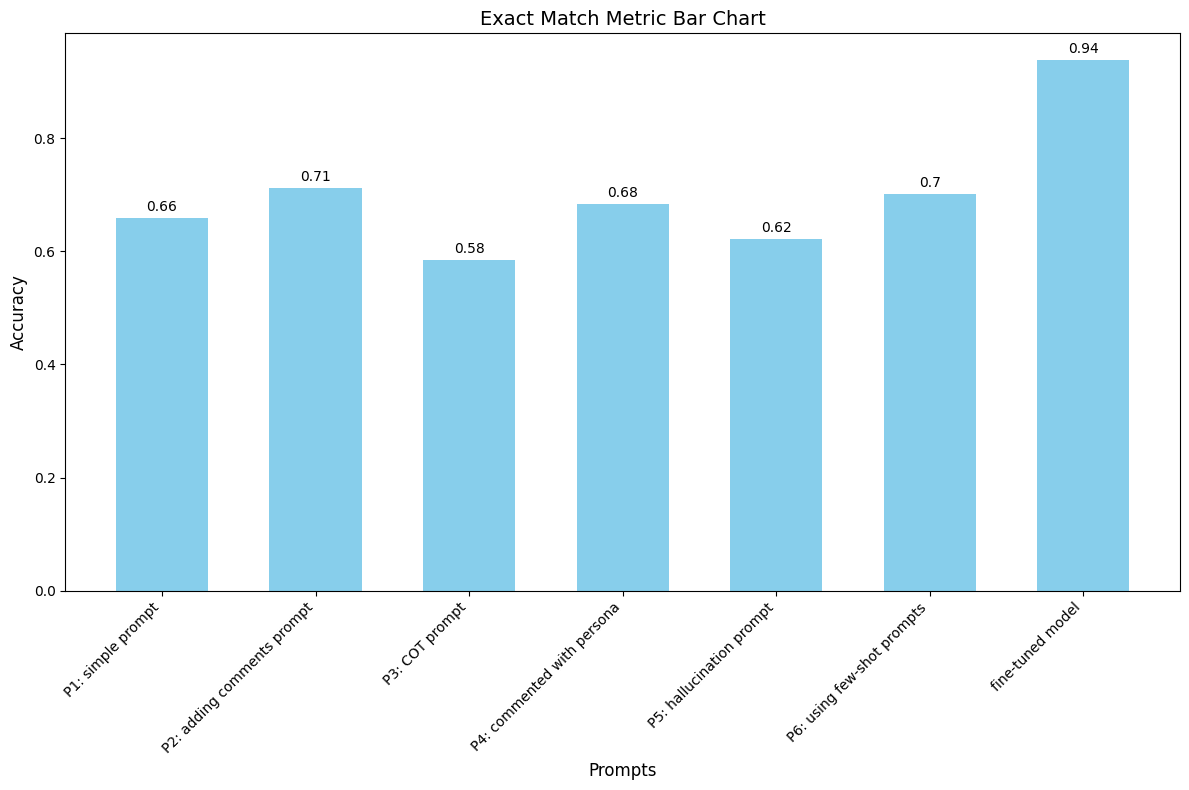

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = list(Bleu_score.keys())  # Categories for the x-axis
y = list(Bleu_score.values())  # Values for the y-axis

# Customize the plot
fig, ax = plt.subplots(figsize=(12, 8))  # Make the figure wider
bars = ax.bar(x, y, color='skyblue', width=0.6)  # Set bar color and width

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.007, round(yval, 2),
            ha='center', va='bottom', fontsize=10, color='black')

# Customize labels and title
plt.xlabel('Prompts', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Exact Match Metric Bar Chart', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and style x-axis labels
plt.tight_layout()  # Adjust layout for better spacing
plt.show()